In [4]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.lib import plot_heatmaps

from backtesting.test import SMA, GOOG
import backtesting

import pandas_ta as ta
import talib
import pandas as pd
import time

import numpy as np

import yfinance as yf
# symbols = list(map(lambda x: x.upper()+".BK", settings.tickers))
ticker = yf.Ticker(ticker='KBANK.BK')
df = ticker.history(period='5y', interval='1d')
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.head()

In [3]:
help(df.ta)

Help on AnalysisIndicators in module pandas_ta.core object:

class AnalysisIndicators(BasePandasObject)
 |  AnalysisIndicators(pandas_obj)
 |  
 |  This Pandas Extension is named 'ta' for Technical Analysis. In other words,
 |  it is a Numerical Time Series Feature Generator where the Time Series data
 |  is biased towards Financial Market data; typical data includes columns
 |  named :"open", "high", "low", "close", "volume".
 |  
 |  This TA Library hopefully allows you to apply familiar and unique Technical
 |  Analysis Indicators easily with the DataFrame Extension named 'ta'. Even
 |  though 'ta' is a Pandas DataFrame Extension, you can still call Technical
 |  Analysis indicators individually if you are more comfortable with that
 |  approach or it allows you to easily and automatically apply the indicators
 |  with the strategy method. See: help(ta.strategy).
 |  
 |  By default, the 'ta' extension uses lower case column names: open, high,
 |  low, close, and volume. You can ove

In [32]:
class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

class SignalStrategyV1(Strategy):
    rsi_upper = 60
    rsi_lower = 15
    rsi_window = 12
    macd_fast = 12
    macd_slow = 26
    macd_sig = 9
    macd_upper = +2.5
    macd_lower = -2.5
    position_size = 0.5

    def init(self):
        self.rsi = self.I(ta.rsi, pd.Series(self.data.Close), self.rsi_window)
        self.macd = self.I(ta.macd, pd.Series(self.data.Close), self.macd_fast, self.macd_slow, self.macd_sig)

    def next(self):
        display_ = True
        # print(self.orders.)
        if (self.rsi[-1]<30): # & (self.macd > self.macd_upper)

            self.buy(size = self.position_size)
            if display_:
                print('BUY', self.position.size, self.equity, self.rsi[-1], self.data.Close[-1])
        # second set the sell signal
        elif (self.rsi[-1] > 75): # & (self.macd < self.macd_lower)
            # print ((self.rsi < self.rsi_lower) & (self.macd > self.macd_upper))
            self.position.close(portion=1)
                # self.sell(size = 0.5)
            # else:
                # self.sell(size = 0.5)
            if display_:
                print('SELL', self.position.size, self.equity, self.rsi[-1], self.data.Close[-1])
        else:
            pass
           

In [147]:
bt = Backtest(
    df.ta.ticker('ITD.BK'),
    SignalStrategyV1,
    commission=.002,
    exclusive_orders=True,
    cash=100_000)
stats = bt.run()
bt.plot()

BUY 0 100000 13.598733462053719 1.8126170635223389
BUY 27529 93118.47017448385 10.801570227694997 1.5662686824798584
BUY 29287 94634.601319124 15.223881858999988 1.6235374212265015
BUY 28676 95923.1614657848 18.84673590109464 1.6708070039749146
BUY 28648 97468.08964455377 23.18536023654066 1.7280765771865845
BUY 28145 95758.96413119174 21.907655459518956 1.6708070039749146
BUY 28434 93227.6863200483 20.10431374651945 1.585357904434204
BUY 29344 93134.64483535287 20.10431374651945 1.585357904434204
BUY 29140 103826.19643595688 28.127683712700495 1.955336093902588
BUY 26857 101567.1184039126 24.75419877030252 1.8798854351043701
BUY 26830 98660.97030230334 27.900596365767665 1.7753461599349976
BUY 28123 98624.89240263466 27.900596365767672 1.7753461599349976
BUY 27575 93297.46451481606 20.787442958762046 1.585357904434204
BUY 30255 94590.82962855714 24.980356600818 1.6235374212265015
BUY 28834 93985.20035731372 24.279372110438054 1.6044480800628662
BUY 29230 93891.40432255324 24.279372110

/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = 

GridPlot(id='p13732', ...)

In [ ]:
s_time = time.time()
stats = bt.optimize(
        rsi_upper = range(50,65,5),
        rsi_lower = range(15,30,5),
        rsi_window = range(10,20,2),
        macd_slow = range(18, 22, 2),
        macd_fast = range(6, 10, 2),
        macd_sig = range(6, 8, 1),
        macd_upper = range(1, 2, 1),
        macd_lower = range(-2, -1, 1),
        maximize='Equity Final [$]')

display(stats['_strategy'])
print('time for the initial strategy test is', time.time() - s_time)

In [26]:
display(stats['_strategy'])

<Strategy SignalStrategyV1(rsi_upper=60,rsi_lower=15,rsi_window=12,macd_slow=18,macd_fast=6,macd_sig=6,macd_upper=1,macd_lower=-2)>

In [33]:
stats.loc['_strategy']

<Strategy SignalStrategyV1(rsi_upper=60,rsi_lower=15,rsi_window=12,macd_slow=18,macd_fast=6,macd_sig=6,macd_upper=1,macd_lower=-2)>

In [94]:
ta.cdl_pattern(name='all')

TypeError: cdl_pattern() missing 4 required positional arguments: 'open_', 'high', 'low', and 'close'

In [101]:
df.ta.cdl_pattern(name="doji")

,CDL_DOJI_10_0.1
2019-01-07,0.0
2019-01-08,0.0
2019-01-09,0.0
2019-01-10,0.0
2019-01-11,0.0
...,...
2023-12-27,0.0
2023-12-28,0.0
2024-01-03,0.0
2024-01-04,0.0


<AxesSubplot:>

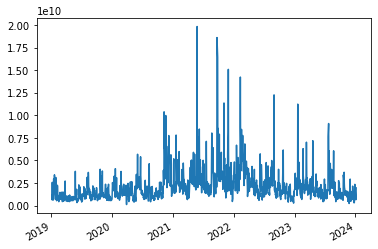

In [106]:
df.ta.pvol().plot()

In [110]:
result = ta.sortino_ratio(df.Close)
result

-0.13576309636285835

In [135]:
df.ta.ticker('ITD.BK', start_date='2020-01-01')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-04,3.587964,3.626143,3.464335,3.626143,85681659,0.0,0.0
2000-01-05,3.378886,3.521605,3.378886,3.464335,31639081,0.0,0.0
2000-01-06,3.464335,3.464335,3.322526,3.322526,11159654,0.0,0.0
2000-01-07,3.378886,3.378886,3.293436,3.322526,3282957,0.0,0.0
2000-01-10,3.378886,3.397975,3.293436,3.293436,9921029,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-03,0.900000,0.930000,0.890000,0.920000,17619800,0.0,0.0
2024-01-04,0.920000,0.960000,0.920000,0.950000,38364800,0.0,0.0
2024-01-05,0.970000,0.980000,0.960000,0.970000,29193200,0.0,0.0


In [117]:
rsi = talib.RSI(df.Close)
rsi

2019-01-07          NaN
2019-01-08          NaN
2019-01-09          NaN
2019-01-10          NaN
2019-01-11          NaN
                ...    
2023-12-27    60.975828
2023-12-28    66.790565
2024-01-03    66.790565
2024-01-04    64.024564
2024-01-05    68.269922
Length: 1212, dtype: float64

In [121]:
temp_df = df.ta.strategy("All")
temp_df

131it [00:02, 51.75it/s]


In [122]:
temp_df

In [123]:
CommonStrategy = ta.CommonStrategy
print("name =", CommonStrategy.name)
print("description =", CommonStrategy.description)
print("created =", CommonStrategy.created)
print("ta =", CommonStrategy.ta)

name = Common Price and Volume SMAs
description = Common Price SMAs: 10, 20, 50, 200 and Volume SMA: 20.
created = Saturday January 6, 2024, NYSE: 15:48:32, Local: 19:48:32 +07, Day 6/365 (2.00%)
ta = [{'kind': 'sma', 'length': 10}, {'kind': 'sma', 'length': 20}, {'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}, {'kind': 'sma', 'close': 'volume', 'length': 20, 'prefix': 'VOL'}]


In [118]:
talib.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [10]:
temp_df = df.copy()
temp_df['return'] = df.Close.pct_change()
temp_df.head()

,Open,High,Low,Close,Volume,return
Date,,,,,,
2019-01-14,157.605286,158.039461,156.736938,157.171112,3899700,NaN
2019-01-15,157.605285,158.907808,157.171111,158.039459,3848600,0.005525
2019-01-16,158.473632,158.907806,157.171109,158.907806,4437100,0.005494
2019-01-17,158.907804,161.078676,158.473630,160.210327,10669700,0.008197
2019-01-18,161.512852,161.947027,157.605283,158.907806,18590800,-0.008130


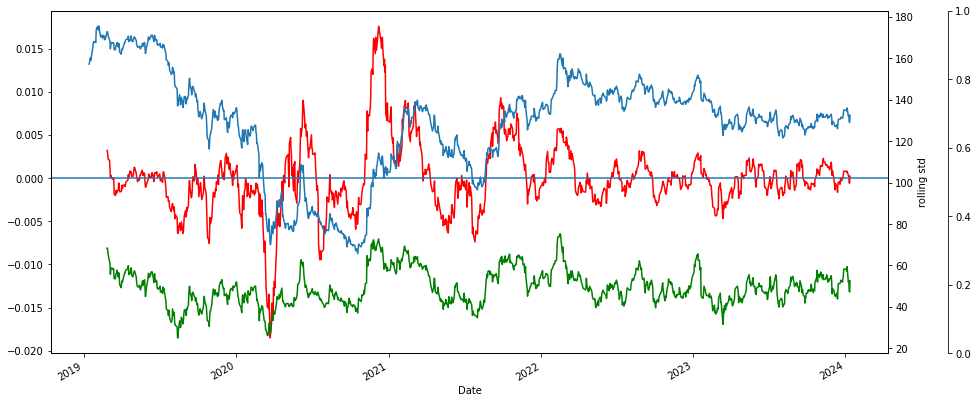

In [67]:
import numpy as np
import matplotlib.pyplot as plt
rolling_sharpe = np.sqrt(252) * temp_df['return'].rolling(252).mean() / temp_df['return'].rolling(252).std()

plt.figure(figsize=(15,7))
ax1=plt.gca()
# rolling_sharpe.plot(ax=ax1, color='r')

ax2=ax1.twinx()

df.Close.plot(ax=ax2)
ax2.set_ylabel('Close')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
temp_df['return'].rolling(30).mean().plot(ax=ax1, color='r')
ta.rsi(df.Close, length=30).plot(ax=ax2, color='g')
# temp_df['return'].rolling(252).std().plot(ax=ax2)
ax2.set_ylabel('rolling std')
ax1.axhline(y=0)


In [ ]:
class SignalStrategyV1(Strategy):
    rsi_upper = 60
    rsi_lower = 15
    rsi_window = 12
    macd_fast = 12
    macd_slow = 26
    macd_sig = 9
    macd_upper = +2.5
    macd_lower = -2.5
    position_size = 0.5

    def init(self):
        self.rsi = self.I(ta.rsi, pd.Series(self.data.Close), self.rsi_window)
        self.macd = self.I(ta.macd, pd.Series(self.data.Close), self.macd_fast, self.macd_slow, self.macd_sig)

    def next(self):
        display_ = True
        # print(self.orders.)
        if (self.rsi[-1]<30): # & (self.macd > self.macd_upper)

            self.buy(size = self.position_size)
            if display_:
                print('BUY', self.position.size, self.equity, self.rsi[-1], self.data.Close[-1])
        # second set the sell signal
        elif (self.rsi[-1] > 75): # & (self.macd < self.macd_lower)
            # print ((self.rsi < self.rsi_lower) & (self.macd > self.macd_upper))
            self.position.close(portion=1)
                # self.sell(size = 0.5)
            # else:
                # self.sell(size = 0.5)
            if display_:
                print('SELL', self.position.size, self.equity, self.rsi[-1], self.data.Close[-1])
        else:
            pass

In [93]:
coef, intercept = np.polyfit(x=np.arange(1,6),y=[1,2,3,4,5], deg=1)

array([1.00000000e+00, 2.34513178e-16])

In [27]:
def rolling_mean_pct_return(data: pd.DataFrame, window: int):
    return data.pct_change().rolling(window).mean().to_numpy()

def rolling_coef(data: pd.DataFrame, window: int):
    return data.rolling(window).apply(get_deg).to_numpy()

def get_deg(window_data: list):
    coef, intercept = np.polyfit(x=np.arange(1,len(window_data)+1),y=window_data, deg=1)
    return coef

def pct_ch(data:pd.DataFrame, rsi_window:int):
    return ta.rsi(data, rsi_window).pct_change()

class TestStratrgyV1(Strategy):
    window = 14 # 14
    rsi_window=14
    coef_window=6 #6
    position_size =0.5
    def init(self):
        
        price = pd.Series(self.data.Close)
        self.rsi = self.I(ta.rsi, price, self.rsi_window)
        self.pct_rsi = self.I(pct_ch, price, self.rsi_window)
        # self.return_rolling = self.I(rolling_mean_pct_return, price, self.window)
        self.lr_coef = self.I(rolling_coef, price, self.coef_window)

    def next(self):
        
        if self.pct_rsi[-1]>0.2:
            # cur_price = self.data.Close[-1]
            # sl_price = cur_price*0.95
            # self.buy(sl=sl_price)
            self.buy(size=self.position_size)
            print('BUY', self.position.size, self.equity, self.data.Close[-1])
        elif self.lr_coef[-1]<0 and self.lr_coef[-2]>0 :
            self.position.close()
            print('SELL', self.position.size, self.equity, self.data.Close[-1])
        # else:
        #     self.position.close()
        #     print('SELL', self.position.size, self.equity, self.data.Close[-1])

        


In [29]:
symbol = "TTB.BK"
ticker = yf.Ticker(ticker=symbol)
df = ticker.history(period='5y', interval='1d')
bt = Backtest(
    df,
    TestStratrgyV1,
    commission=.002,
    exclusive_orders=True,
    cash=100_000)
stats = bt.run()
bt.plot()
stats

SELL 0 100000 1.6335489749908447
SELL 0 100000 1.5606223344802856
BUY 0 100000 1.58979332447052
BUY 31387 98526.82488126031 1.5460370779037476
BUY 31954 97039.05053196136 1.5022813081741333
BUY 32232 97882.44681907646 1.5314522981643677
SELL 31893 96854.41115389318 1.5022813081741333
SELL 0 96854.40349414016 1.5017733573913574
BUY 0 96854.40349414016 1.5244135856628418
BUY 31704 93886.63417465687 1.4338536262512207
SELL 32673 93546.37323595809 1.426307201385498
BUY 0 93792.94333935974 1.4414005279541016
BUY 32470 94924.51451013681 1.4791332483291626
SELL 32023 95554.78614334027 1.5017733573913574
SELL 0 95796.45492921426 1.5017733573913574
SELL 0 95796.45492921426 1.4640406370162964
BUY 0 95796.45492921426 1.4564940929412842
SELL 32651 94961.62314725656 1.4414005279541016
BUY 0 95454.44042735423 1.4640406370162964
SELL 32703 94865.57005682515 1.4414005279541016
BUY 0 94618.77357684541 1.1697231531143188
BUY 40364 93915.1135062195 1.1546298265457153
BUY 40996 93527.22490616153 1.1470831

/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = 

Start                     2019-01-22 00:00:00
End                       2024-01-22 00:00:00
Duration                   1826 days 00:00:00
Exposure Time [%]                   24.669967
Equity Final [$]                 99135.938194
Equity Peak [$]                 106874.331047
Return [%]                          -0.864062
Buy & Hold Return [%]               12.593249
Return (Ann.) [%]                   -0.180274
Volatility (Ann.) [%]                8.187828
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -13.643106
Avg. Drawdown [%]                   -8.295817
Max. Drawdown Duration     1517 days 00:00:00
Avg. Drawdown Duration      592 days 00:00:00
# Trades                                   53
Win Rate [%]                        39.622642
Best Trade [%]                      12.932084
Worst Trade [%]                    -13.965168
Avg. Trade [%]                    

In [12]:
#     window = 14
#     rsi_window=30
#     coef_window=7
s_time = time.time()
stats_skopt, heatmap, optimize_result = bt.optimize(
        window = [1,30],
        coef_window = [1,30],
        maximize='Equity Final [$]',
        constraint= lambda x: x.window>x.coef_window,
        method='skopt',
        max_tries=200,
        return_heatmap=True,
        return_optimization=True,
)

display(stats['_strategy'])
print('time for the initial strategy test is', time.time() - s_time)

Backtest.optimize:   0%|          | 0/200 [00:00<?, ?it/s]

SELL 0 100000 -0.002111649944123839 168.02548217773438
BUY 0 100000 4.199518611121556e-05 164.5520477294922
BUY 604 101374.14996409584 0.00017358367799316098 167.59130859375
SELL 603 100638.74199925207 0.0006807272861027947 166.7069091796875
SELL 0 100372.0917482755 -0.0018422392773803308 162.28497314453125
BUY 0 100372.0917482755 4.388738355701749e-05 170.24444580078125
SELL 588 99131.8574855802 0.00044024907290923787 168.47569274902344
SELL 0 98871.8335824874 -0.005114709532110673 137.96432495117188
BUY 0 98871.8335824874 0.0006574413722633566 146.3660125732422
SELL 666 95425.17570591782 0.002163563993648193 143.26126098632812
BUY 0 95720.57506162382 0.000433784486869232 139.2694549560547
SELL 692 84787.28699906722 -0.0077519944091877565 122.41521453857422
BUY 0 84787.28926172765 0.0004912106570137853 133.9470672607422
BUY 623 82683.94517741229 0.004201913540942093 132.61647033691406
SELL 622 81691.34849196534 -0.001355214303502278 131.285888671875
BUY 0 80863.69424656188 0.000889633

/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/pandas/core/window/rolling.py:1348: RankWarning: Polyfit may be poorly conditioned
  return window_func(values, begin, end, min_periods)
/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/pandas/core/window/rolling.py:1348: RankWarning: Polyfit may be poorly conditioned
  return window_func(values, begin, end, min_periods)
/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/pandas/core/window/rolling.py:1348: RankWarning: Polyfit may be poorly conditioned
  return window_func(values, begin, end, min_periods)
/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/pandas/core/window/rolling.py:1348: RankWarning: Polyfit may be poorly conditioned
  return window_func(values, begin, end, min_periods)
/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/pandas/core/window/rolling.py:1348: RankWarning: Polyfit 

BUY 0 100000 0.00020382024050188472 167.59130859375
BUY 595 100063.65701049802 0.0005063578024546188 168.03347778320312
BUY 594 83316.12332161878 0.0014268302978382146 140.17532348632812
BUY 593 77878.3582960228 0.0003665856655302724 131.285888671875
BUY 592 78247.80720784479 0.0003730912593053895 132.17294311523438
BUY 590 80447.36338767623 0.0027110100877032668 136.16473388671875
BUY 589 74800.98017898762 0.0006358757196381642 126.85054016113281
BUY 588 73348.27536831867 0.000574719374155587 124.63285827636719
BUY 587 49900.35218987974 0.0019362757945890518 84.93663787841797
BUY 586 45750.49841469793 0.0009383712627579428 78.02471923828125
BUY 585 47289.29049067741 0.0007412636809307221 80.81131744384766
BUY 584 49500.234016432696 0.0014198627436936301 84.75900268554688
BUY 582 49536.52560889775 0.0004445930890754983 84.9912109375
BUY 581 47414.07522165248 0.0007741642393149326 81.50796508789062
BUY 580 46107.317503556944 0.00011820002513969066 79.41801452636719
BUY 579 44939.6174089

InvalidParameterError: The 'criterion' parameter of ExtraTreesRegressor must be a str among {'poisson', 'absolute_error', 'squared_error', 'friedman_mse'}. Got 'mse' instead.

In [127]:
from skopt.plots import plot_objective

_ = plot_objective(optimize_result, n_points=10)

GridPlot(id='p10346', ...)